In [3]:
from multispecies import *

In [4]:
import numpy as np
from tqdm import tqdm
import datetime 
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr, poisson
from scipy.special import softmax
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances
from matplotlib import animation
from IPython.display import HTML
import pandas as pd
from numba import jit

In [84]:
import numpy as np
from tqdm import tqdm

# Initialize population parameters
species_params = {
    'predators': [
        {
            'num': 100,
            'detector_mean': np.array([0, 1]),
            'detector_cov': 0.4**2 * np.eye(2),
            'risk_tol_mean': 0.1
        }
    ],
    'prey': [
        {
            'num': 1000,
            'signal_mean': np.array([1 / np.sqrt(2), -1 / np.sqrt(2)]),
            'signal_cov': 0.4**2 * np.eye(2),
            'venom_level': 0.2
        },
        {
            'num': 1000,
            'signal_mean': np.array([-1 / np.sqrt(2), -1 / np.sqrt(2)]),
            'signal_cov': 0.4**2 * np.eye(2),
            'venom_level': 0.0
        },
        {
            'num': 1000,
            'signal_mean': np.array([-1 / np.sqrt(2), 1 / np.sqrt(2)]),
            'signal_cov': 0.4**2 * np.eye(2),
            'venom_level': 0.8
        },
        {
            'num': 1000,
            'signal_mean': np.array([1 / np.sqrt(2), 1 / np.sqrt(2)]),
            'signal_cov': 0.4**2 * np.eye(2),
            'venom_level': 0.0
        },
    ]
}

num_generations = 2000
handling_times = np.array([0.4])  # One for each predator species
attack_freqs = np.array([0.3])    # One for each predator species
mutation_rates = {'predators': 0.1, 'prey': 0.01}
predator_conversion_ratios = np.array([0.8])  # One for each predator species
prey_popcaps = np.array([1000, 1000, 1000, 1000])  # One for each prey species
periodic_boundary = 2

num_prey = len(species_params['prey'])
num_pred = len(species_params['predators'])

np.random.seed(1)

detectors, signals, risk_tols, venom_levels, species_indices = generate(species_params)

history = {
    'detectors': [detectors],
    'signals': [signals],
    'risk_tols': [risk_tols],
    'venom_levels': [venom_levels],
    'species_indices': [species_indices]
}

for t in tqdm(range(num_generations)):
    d, s, r, v, si = update(
        history['detectors'][-1], 
        history['signals'][-1], 
        history['risk_tols'][-1], 
        history['venom_levels'][-1], 
        history['species_indices'][-1],
        handling_times=handling_times,
        attack_freqs=attack_freqs,
        predator_conversion_ratios=predator_conversion_ratios,
        prey_popcaps=prey_popcaps,
        mutation_rates=mutation_rates,
        phenotype_type='vector',
        periodic_boundary=periodic_boundary,
    )
    
    history['detectors'].append(d)
    history['signals'].append(s)
    history['risk_tols'].append(r)
    history['venom_levels'].append(v)
    history['species_indices'].append(si)

  2%|▋                                        | 31/2000 [00:02<03:27,  9.48it/s]/Users/ejhall2/Desktop/mimicry/multispecies.py:208: RuntimeWarning: divide by zero encountered in scalar divide
  fitnesses[start:end] = popcaps[i] / species_sizes[i] * np.prod(1 - predation_matrix[:, start:end], 0)
100%|██████████████████████████████████████| 2000/2000 [00:03<00:00, 521.99it/s]


<Axes: >

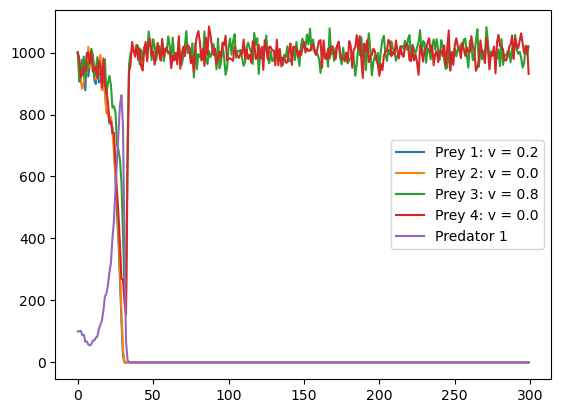

In [85]:
species_counts = []
for d in history['species_indices']:
    counts = []
    for i, (u, v) in d['prey'].items():
        counts.append(v - u)
    for i, (u, v) in d['predators'].items():
        counts.append(v - u)
    species_counts.append(counts)
species_counts = pd.DataFrame(
    species_counts, 
    columns = [f"Prey {i+1}: v = {species_params['prey'][i]['venom_level']}" for i in range(num_prey)] + [f"Predator {i+1}" for i in range(num_pred)]
    )
species_counts[:300].plot()

/var/folders/mp/32m29kq1643bw2wj_l7slh380000gn/T/ipykernel_2863/3395505307.py:1: RuntimeWarning: Mean of empty slice.
  plt.plot([h.mean() for h in history['risk_tols']])


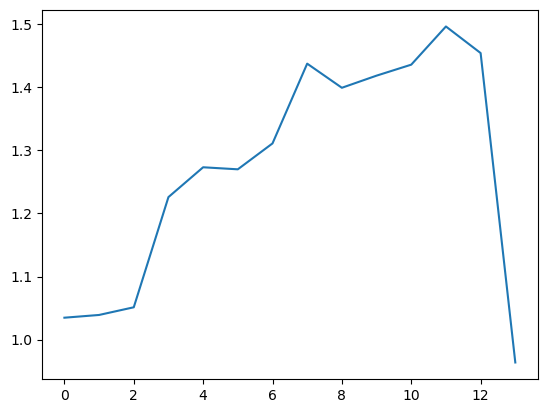

In [47]:
plt.plot([h.mean() for h in history['risk_tols']])